In [55]:
!pip install vaderSentiment

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [56]:
import csv
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pandas as pd
import os.path

data_sufix = 'data/'

In [57]:
# configure Session class with desired options
Session = sessionmaker()
engine = create_engine('sqlite:///twitter.db')

In [58]:
engine.table_names()

['hashes', 'hashtag', 'retweet', 'tweet', 'user']

In [59]:
#VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

allTweets = pd.read_sql_query('SELECT tweet_id as id, tweet_text as text FROM tweet', engine)
print(allTweets.shape)

(28377, 2)


In [60]:
allRetweets =  pd.read_sql_query('SELECT retweet_id as id, retweet_text as text FROM retweet', engine)
print(allRetweets.shape)

(128339, 2)


In [61]:
vaderData = allTweets.append([allRetweets])
vaderData.drop_duplicates(inplace=True)
# vaderData = vaderData[:60000]
vaderData.shape

(150564, 2)

In [65]:
vaderIDs = pd.read_sql_query('SELECT id FROM vader', engine)
solo = vaderIDs.drop_duplicates()
print(solo.shape)
vaderIDs.shape

OperationalError: (sqlite3.OperationalError) no such table: vader [SQL: 'SELECT id FROM vader'] (Background on this error at: http://sqlalche.me/e/e3q8)

In [66]:
newVaders = pd.DataFrame(columns=['id', 'negative','neutral','positive','compound'])

In [67]:
for index, row in vaderData.iterrows():
     if(not vaderIDs['id'].isin([row['id']]).any()):
        snt = analyser.polarity_scores(row['text'])
        newVaders = newVaders.append({'id': row['id'],
                                     'negative': snt['neg'],
                                     'neutral': snt['neu'],
                                     'positive': snt['pos'],
                                     'compound': snt['compound']}, ignore_index=True)
newVaders

,id,negative,neutral,positive,compound
0,1.061351e+18,0.109,0.820,0.071,-0.1779
1,1.061357e+18,0.000,1.000,0.000,0.0000
2,1.061358e+18,0.000,1.000,0.000,0.0000
3,1.061375e+18,0.000,0.917,0.083,0.2023
4,1.061392e+18,0.069,0.931,0.000,-0.1027
5,1.061397e+18,0.000,1.000,0.000,0.0000
6,1.061404e+18,0.000,1.000,0.000,0.0000
7,1.061417e+18,0.000,1.000,0.000,0.0000
8,1.061423e+18,0.000,1.000,0.000,0.0000
9,1.061458e+18,0.000,1.000,0.000,0.0000


In [68]:
newVaders.to_sql('vader', engine, if_exists='append')

In [69]:
# from sqlalchemy import MetaData, Table
# meta = MetaData()
# vader_tab = Table('vader', meta)
# vader_tab.drop(engine)

In [70]:
#Analyse
analyse_df = pd.read_sql_query('SELECT * FROM vader', engine)
analyse_df.shape

(109508, 6)

In [71]:
for index, row in analyse_df.iterrows():
    final_score = round(row["compound"],2) * 50 + 50
    analyse_df.at[index,'percent'] = final_score
    if(final_score<34):
        analyse_df.at[index,'mood'] = "Bad"
    elif(final_score<67):
        analyse_df.at[index,'mood'] = "Neutral"
    else:
        analyse_df.at[index,'mood'] = "Good"

In [72]:
analyse_df

,index,id,negative,neutral,positive,compound,percent,mood
0,0,1.061351e+18,0.109,0.820,0.071,-0.1779,41.0,Neutral
1,1,1.061357e+18,0.000,1.000,0.000,0.0000,50.0,Neutral
2,2,1.061358e+18,0.000,1.000,0.000,0.0000,50.0,Neutral
3,3,1.061375e+18,0.000,0.917,0.083,0.2023,60.0,Neutral
4,4,1.061392e+18,0.069,0.931,0.000,-0.1027,45.0,Neutral
5,5,1.061397e+18,0.000,1.000,0.000,0.0000,50.0,Neutral
6,6,1.061404e+18,0.000,1.000,0.000,0.0000,50.0,Neutral
7,7,1.061417e+18,0.000,1.000,0.000,0.0000,50.0,Neutral
8,8,1.061423e+18,0.000,1.000,0.000,0.0000,50.0,Neutral
9,9,1.061458e+18,0.000,1.000,0.000,0.0000,50.0,Neutral


In [73]:
%matplotlib inline

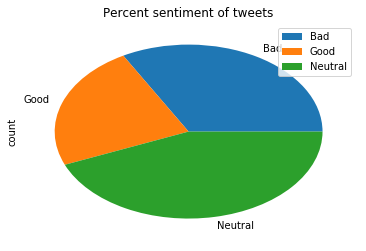

In [74]:
figure = analyse_df[['id', 'mood']].groupby(['mood']).agg(['count']).rename(columns={'id': 'amount'})
figure.plot.pie("amount", title="Percent sentiment of tweets")

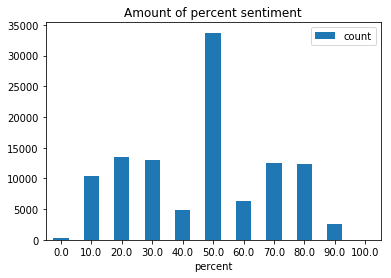

In [75]:

figure2 = analyse_df[['id', 'percent']].round({"percent": -1}).groupby(['percent']).agg(['count']).rename(columns={'id': 'amount'})
figure2.plot.bar( y='amount', rot=0, title="Amount of percent sentiment")

In [76]:
# associate it with our custom Session class
Session.configure(bind=engine)